<a href="https://colab.research.google.com/github/nurfnick/Numerical_Methods/blob/master/ProjectPart7Integration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Part 7

##Integration

In [6]:
#Load your packages
import numpy as np
from scipy import integrate
import matplotlib.pyplot as plt
import pandas as pa
import math


%matplotlib inline

Let's revisit our original function $f(x) = \sin x$ and investigate the the first hump and its area,
$$
A = \int_0^\pi \sin x\ dx
$$

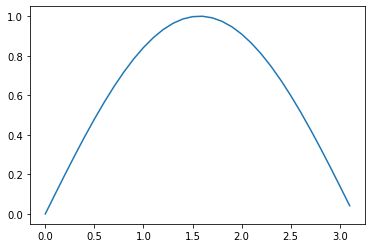

In [ ]:
x = np.arange( 0,3.15,.1)
plt.plot(x,np.sin(x))

To get the actual area, we preform the integration using the scipy package (technically this is a numerical calculation...)

In [ ]:
integrate.quad(np.sin ,0,np.pi)

(2.0, 2.220446049250313e-14)

Lets do it by hand!

$$
\begin{align}
A &= \int_0^\pi \sin x \ dx\\
&= -\cos x\vert_0^\pi\\
&= -\cos\pi+\cos 0\\
&= 2 
\end{align}
$$

## Numerical Integration:  Riemann Sum

There are three different Riemann Sums, a left, center and right.  Essentially you compute the area under the curve by creating $n$ little rectangles of equal width, $\Delta x = \frac{b-a}n$, computing the height using the function of interest chosing the point consistently.

$$
A\approx \sum_{i=1}^n f(a+i\Delta x)\Delta x
$$

In [13]:
def deltax(a,b,n):
  return (b-a)/n

def riemannSum(function,a,b,n,indicator = 'right'):
  dx = deltax(a,b,n)
  if indicator == 'right':
    start = 1
  elif indicator == 'left':
    start = 0
  elif indicator == 'mid':
    start = 0.5
  sum = 0
  for j in np.arange(start,n+start):
    sum = sum + function(a + j*dx)*dx
  return sum



In [14]:
riemannSum(np.sin, 0,np.pi,10,'left')

1.9835235375094544

In [15]:
riemannSum(np.sin,0,np.pi,10,'mid')

2.0082484079079745

##Simpson's $\frac13$ Rule

Simpson's $\frac 13$ rule states that 
$$
\int_a^b f(x)\ dx
\approx 
\frac{\Delta x}3 
\left[
f(a)
+
4\sum_{odd} f(x_i)
+
2\sum_{even} f(x_i)
+
f(b)
\right]
$$

In [21]:
def simpson(function, a, b , n):
  dx = deltax(a,b,n)
  sum = 0
  for i in range(1,n,2): #odds
    sum = sum + 4*function(a+dx*i)
  for i in range(0,n,2): #evens
    sum = sum + 2*function(a+dx*i)
  for i in [a,b]: #endpoints
    sum = sum + function(i)
  sum = dx /3 *sum #multiply by the width/3
  return sum

In [24]:
simpson(np.sin, 0 , np.pi,1000)

2.0000000000010787